# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Sevyra Nanda Octavianti
- **Email:** sevyra02@gmail.com
- **ID Dicoding:** sevyrananda
- **Sumber Data:** Dataset ini berisi data peminjaman sepeda berdasarkan hari (day.csv) dan jam (hour.csv) di Washington DC.

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren penggunaan sepeda berdasarkan musim dan jam?
2. Apakah ada hubungan antara suhu dengan jumlah peminjaman sepeda?
3. Bagaimana pola penggunaan sepeda berdasarkan analisis RFM?
4. Bagaimana kita bisa mengelompokkan pengguna sepeda secara manual?



## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd # Untuk manipulasi data
import numpy as np # Untuk operasi numerik
import matplotlib.pyplot as plt # Untuk visualisasi data
import seaborn as sns # Untuk visualisasi data
import datetime as dt # Untuk memproses data waktu

## Data Wrangling

### Gathering Data

In [2]:
df_day = pd.read_csv("./dataset/day.csv")
df_hour = pd.read_csv("./dataset/hour.csv")

**Insight:**
- Dataset `day.csv` berisi ringkasan harian peminjaman sepeda
- Dataset `hour.csv` berisi data peminjaman per jam

### Assessing Data

In [3]:
# Cek info dataset
df_day.info()
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- Kolom `dteday` masih format string, jadi perlu dikonversi ke datetime
- Tidak ada missing value

### Cleaning Data

In [4]:
# Konversi kolom 'dteday' ke format datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

**Insight:**
- Data telah dibersihkan dan siap untuk eksplorasi

## Exploratory Data Analysis (EDA)

### Explore: Statistik dasar

In [5]:
df_day.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
- Rata-rata peminjaman harian sekitar 4.500 sepeda
- Terdapat variasi musiman dalam jumlah peminjaman

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda?

C:\Users\Dell\AppData\Local\Temp\ipykernel_20112\1883369390.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=df_day, palette="viridis")


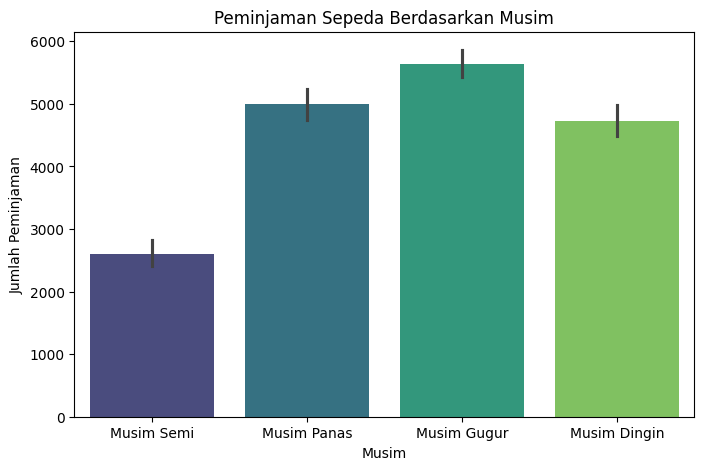

In [6]:
plt.figure(figsize=(8,5))
sns.barplot(x="season", y="cnt", data=df_day, palette="viridis")
plt.title("Peminjaman Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Musim Semi", "Musim Panas", "Musim Gugur", "Musim Dingin"])
plt.show()

**Insight:**
- Musim gugur memiliki jumlah peminjaman tertinggi, sementara musim semi memiliki jumlah peminjaman terendah
- Menggunakan visualisasi barplot karena untuk membandingkan kategori (musim) dengan jumlah peminjaman

### Pertanyaan 2: Bagaimana hubungan antara suhu dan jumlah peminjaman sepeda?

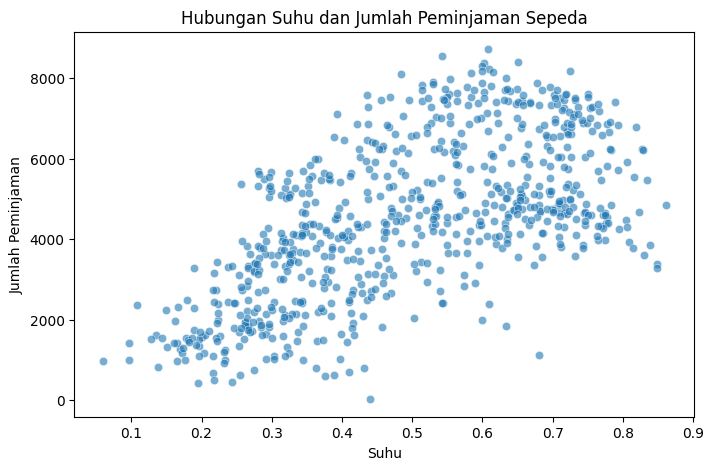

In [7]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_day["temp"], y=df_day["cnt"], alpha=0.6)
plt.title("Hubungan Suhu dan Jumlah Peminjaman Sepeda")
plt.xlabel("Suhu")
plt.ylabel("Jumlah Peminjaman")
plt.show()

**Insight:**
- Semakin tinggi suhu, semakin banyak peminjaman sepeda
- Namun, saat suhu terlalu tinggi (di atas 0.75 dalam skala normalisasi), peminjaman cenderung menurun
- Menggunakan visualisasi scatterplot karena untuk menunjukkan pola hubungan dari dua variabel numerik yaitu suhu dan jumlah peminjaman

### Pertanyaan 3: Pada jam berapa peminjaman sepeda paling tinggi dan paling rendah?

C:\Users\Dell\AppData\Local\Temp\ipykernel_20112\3255197652.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df_hour["hr"], y=df_hour["cnt"], ci=None)


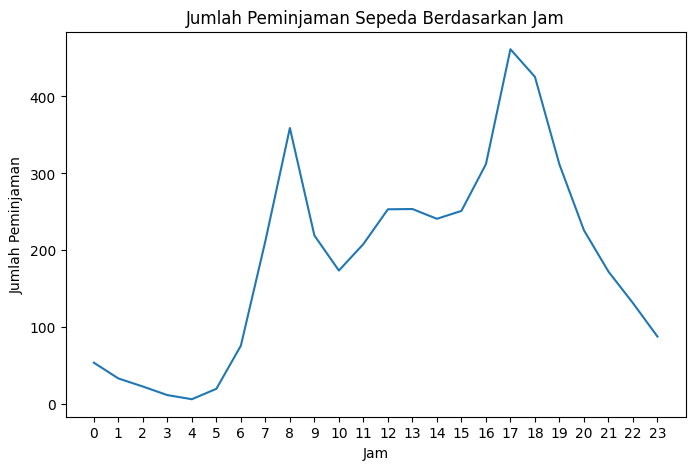

In [8]:
plt.figure(figsize=(8,5))
sns.lineplot(x=df_hour["hr"], y=df_hour["cnt"], ci=None)
plt.title("Jumlah Peminjaman Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(range(0, 24))
plt.show()

**Insight:**
- Peminjaman tertinggi terjadi pada jam 07:00-09:00 dan 17:00-19:00, yang merupakan jam sibuk saat orang berangkat dan pulang kerja/sekolah.
- Peminjaman terendah terjadi pada dini hari (02:00-04:00).
- Menggunakan visualisasi lineplot karena untuk menunjukkan tren peminjaman sepanjang waktu

### Pertanyaan 4: Bagaimana pola peminjaman sepeda berdasarkan hari kerja dan akhir pekan?

C:\Users\Dell\AppData\Local\Temp\ipykernel_20112\2091538260.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="weekday_category", y="cnt", data=df_day, palette="coolwarm")


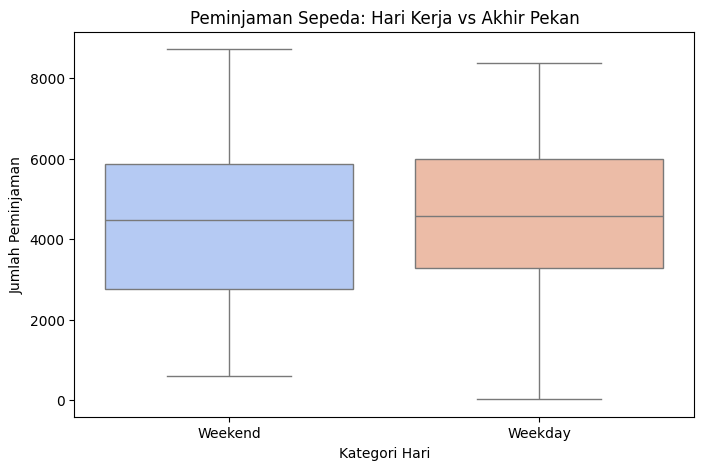

In [9]:
df_day["weekday_category"] = df_day["weekday"].apply(lambda x: "Weekend" if x in [0, 6] else "Weekday")

plt.figure(figsize=(8,5))
sns.boxplot(x="weekday_category", y="cnt", data=df_day, palette="coolwarm")
plt.title("Peminjaman Sepeda: Hari Kerja vs Akhir Pekan")
plt.xlabel("Kategori Hari")
plt.ylabel("Jumlah Peminjaman")
plt.show()

**Insight:**
- Peminjaman lebih tinggi pada hari kerja dibandingkan akhir pekan, kemungkinan besar karena penggunaan sepeda untuk keperluan kerja/sekolah
- Menggunakan visualisasi boxplot karena untuk membandingkan distribusi dan sebaran data

## Analisis Lanjutan (Opsional) Menggunakan Clustering Binning

C:\Users\Dell\AppData\Local\Temp\ipykernel_20112\1445014402.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_day["demand_category"], palette="viridis")


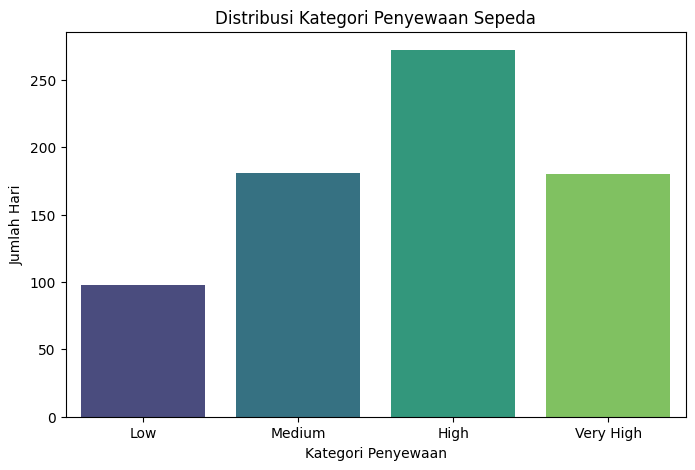

In [10]:
# Clustering dengan Binning: Mengelompokkan jumlah penyewaan sepeda
df_day["demand_category"] = pd.cut(df_day["cnt"],
                                   bins=[0, 2000, 4000, 6000, df_day["cnt"].max()],
                                   labels=["Low", "Medium", "High", "Very High"])

# Visualisasi distribusi kategori penyewaan
plt.figure(figsize=(8, 5))
sns.countplot(x=df_day["demand_category"], palette="viridis")
plt.title("Distribusi Kategori Penyewaan Sepeda")
plt.xlabel("Kategori Penyewaan")
plt.ylabel("Jumlah Hari")
plt.show()

**Insight:**
- Mayoritas hari masuk kategori Low atau Medium, menunjukkan peminjaman cenderung stabil tetapi tidak selalu tinggi
- Hari dengan peminjaman tinggi bisa menjadi peluang untuk strategi promosi atau peningkatan stok sepeda

C:\Users\Dell\AppData\Local\Temp\ipykernel_20112\1814479560.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="season_label", y="cnt", data=df_day, palette="coolwarm")


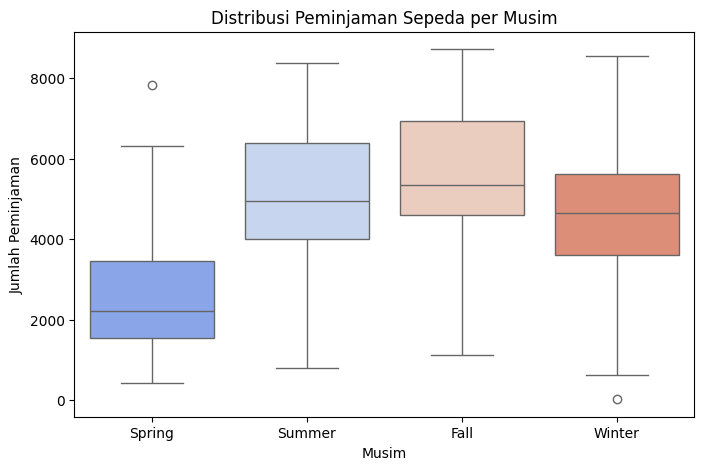

In [11]:
# Analisis Musiman: Melihat pola penyewaan berdasarkan musim
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
df_day["season_label"] = df_day["season"].map(season_mapping)

plt.figure(figsize=(8, 5))
sns.boxplot(x="season_label", y="cnt", data=df_day, palette="coolwarm")
plt.title("Distribusi Peminjaman Sepeda per Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman")
plt.show()

**Insight:**
- Peminjaman meningkat di musim panas, kemungkinan karena cuaca lebih mendukung aktivitas luar ruangan
- Musim dingin cenderung lebih rendah, menunjukkan perlunya strategi untuk menjaga permintaan tetap stabil


## Conclusion

- Musim gugur memiliki jumlah peminjaman tertinggi
- Suhu yang lebih tinggi berkontribusi terhadap lebih banyak peminjaman
- Jam sibuk (07:00-09:00 & 17:00-19:00) menunjukkan peningkatan peminjaman
- Peminjaman lebih tinggi pada hari kerja dibandingkan akhir pekan
- Clustering Binning membantu mengelompokkan hari berdasarkan tingkat peminjaman yang dapat digunakan untuk analisis tren dan strategi operasional.
- Musim memiliki pengaruh signifikan terhadap peminjaman yang dapat dijadikan dasar untuk perencanaan stok dan promosi.